# Análise de fatores do Conjunto de dados de custos de seguro médico <br>
Dataset: = https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
<br><br>

# Preparação dos Dados

Carregando os Dados

In [34]:
import pandas as pd

df = pd.read_csv('insurance.csv', sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Verificando NaN e limpando o data frame

In [35]:
#Verificando se tem valores nulos
df.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [36]:
#Transformando as strings em numeros
df_corr = df.copy()

df_corr['sex'] = df['sex'].map({'female': 0, 'male': 1})
df_corr['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df_corr['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df_corr

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


# Análise Exploratória de Dados

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df_corr.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Estatísticas

In [41]:
# Calculando a média das idades, imc, numero de crianças e custo do seguro medico
media_idade = df['age'].mean()
media_imc = df['bmi'].mean()
media_criancas = df['children'].mean()
media_custo_seguro = df['charges'].mean()

print("Média das idades:", media_idade)
print("Média do IMC:", media_imc)
print("Média do número de crianças:", media_criancas)
print("Média do custo do seguro:", media_custo_seguro)

Média das idades: 39.20702541106129
Média do IMC: 30.66339686098655
Média do número de crianças: 1.0949177877429
Média do custo do seguro: 13270.422265141257


In [42]:
# Calculando a mediana
mediana_idade = df['age'].median()
mediana_imc = df['bmi'].median()
mediana_criancas = df['children'].median()
mediana_custo_seguro = df['charges'].median()

print("Mediana das idades:", mediana_idade)
print("Mediana do IMC:", mediana_imc)
print("Mediana do número de crianças:", mediana_criancas)
print("Mediana do custo do seguro:", mediana_custo_seguro)

Mediana das idades: 39.0
Mediana do IMC: 30.4
Mediana do número de crianças: 1.0
Mediana do custo do seguro: 9382.033


In [43]:
# Calculando o desvio padrão
desv_idade = df['age'].std()
desv_imc = df['bmi'].std()
desv_criancas = df['children'].std()
desv_custo_seguro = df['charges'].std()

print("Desvio Padrão das idades:", desv_idade)
print("Desvio Padrão do IMC:", desv_imc)
print("Desvio Padrão do número de crianças:", desv_criancas)
print("Desvio Padrão do custo do seguro:", desv_custo_seguro)

Desvio Padrão das idades: 14.049960379216172
Desvio Padrão do IMC: 6.098186911679017
Desvio Padrão do número de crianças: 1.2054927397819095
Desvio Padrão do custo do seguro: 12110.011236693994


In [44]:
# Calculando o mínimo
min_idade = df['age'].min()
min_imc = df['bmi'].min()
min_criancas = df['children'].min()
min_custo_seguro = df['charges'].min()

print("Mínimo das idades:", min_idade)
print("Mínimo do IMC:", min_imc)
print("Mínimo do número de crianças:", min_criancas)
print("Mínimo do custo do seguro:", min_custo_seguro)

Mínimo das idades: 18
Mínimo do IMC: 15.96
Mínimo do número de crianças: 0
Mínimo do custo do seguro: 1121.8739


In [45]:
# Calculando o máximo
max_idade = df['age'].max()
max_imc = df['bmi'].max()
max_criancas = df['children'].max()
max_custo_seguro = df['charges'].max()

print("Máximo das idades:", max_idade)
print("Máximo do IMC:", max_imc)
print("Máximo do número de crianças:", max_criancas)
print("Máximo do custo do seguro:", max_custo_seguro)

Máximo das idades: 64
Máximo do IMC: 53.13
Máximo do número de crianças: 5
Máximo do custo do seguro: 63770.42801


# Correlações

In [46]:
df_corr[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr('pearson')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [47]:
df_corr[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr('spearman')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,-0.004315,0.534392
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,-0.004614,0.009490
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,-0.152959,0.119396
children,0.056992,0.015589,0.015607,1.000000,0.016583,-0.010604,0.133339
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,0.002155,0.663460
region,-0.004315,-0.004614,-0.152959,-0.010604,0.002155,1.000000,0.043531
charges,0.534392,0.009490,0.119396,0.133339,0.663460,0.043531,1.000000


In [51]:
# Selecionando apenas sexo feminino
df_fem = df[df['sex'] == 'female']
df_fem

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [53]:
# Selecionando apenas fumantes
df_fum = df[df['smoker'] == 'yes']
df_fum

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [54]:
# Selecionando apenas obesos
df_obes = df[df['bmi'] > 30]
df_obes

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
6,46,female,33.44,1,no,southeast,8240.58960
12,23,male,34.40,0,no,southwest,1826.84300
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1333,50,male,30.97,3,no,northwest,10600.54830
1334,18,female,31.92,0,no,northeast,2205.98080


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Visualização(Gráficos)

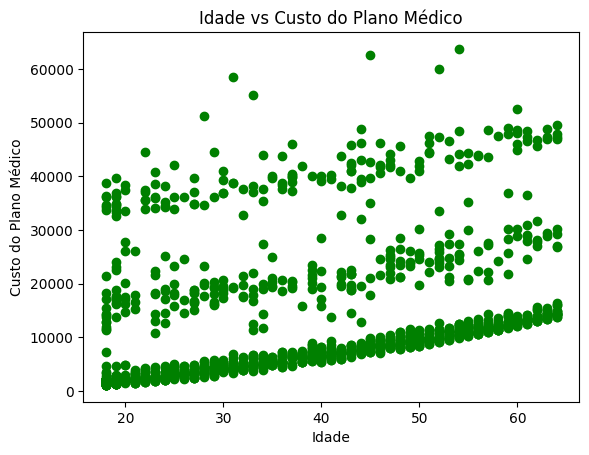

In [56]:
# Gráfico de Linhas(Como a base de dados não é favoável, trocou-se pelo scatter)

from matplotlib import pyplot as plt

# cria um gráfico
plt.scatter( df['age'], df['charges'], color ='green', marker ='o', linestyle ='solid')
# adiciona um título
plt.title("Idade vs Custo do Plano Médico")
# adiciona um selo no eixo y
plt.ylabel("Custo do Plano Médico")
# adiciona um selo no eixo x
plt.xlabel("Idade")
# mostra o gráfico
plt.show()

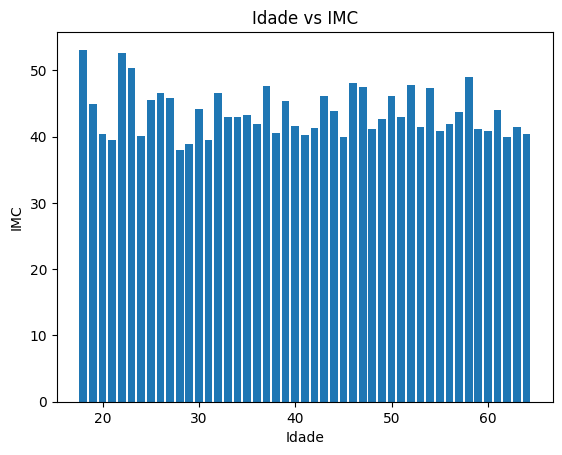

In [57]:
# Gráfico de Barras

plt.bar(df['age'], df['bmi'])
plt.title("Idade vs IMC")
plt.ylabel("IMC")
plt.xlabel("Idade")
plt.show()

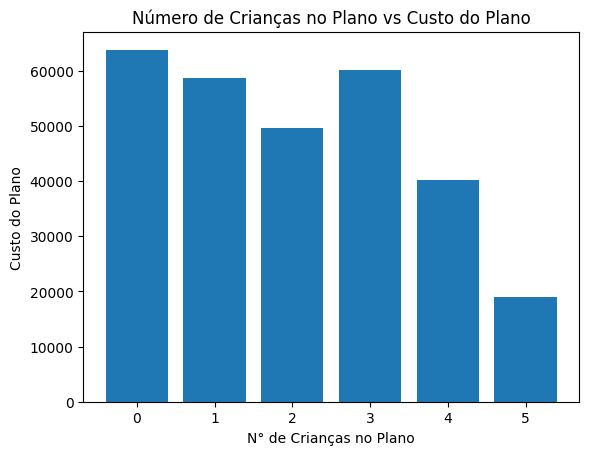

In [84]:
# Gráfico de Barras

plt.bar(df['children'], df['charges'])
plt.title("Número de Crianças no Plano vs Custo do Plano")
plt.xlabel("N° de Crianças no Plano")
plt.ylabel("Custo do Plano")
plt.show()

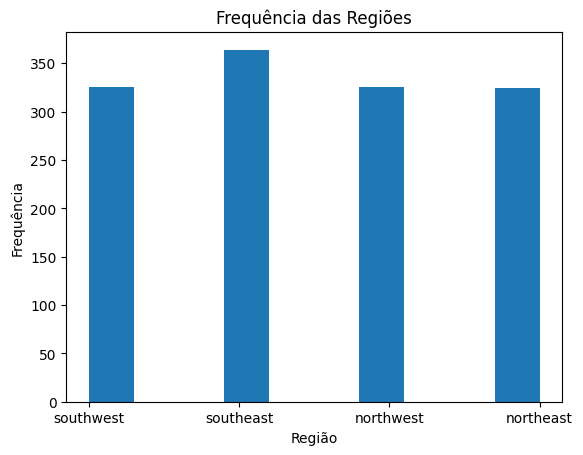

In [60]:
# Histograma

plt.hist(df['region'])
plt.title("Frequência das Regiões")
plt.xlabel("Região")
plt.ylabel("Frequência")
plt.show()

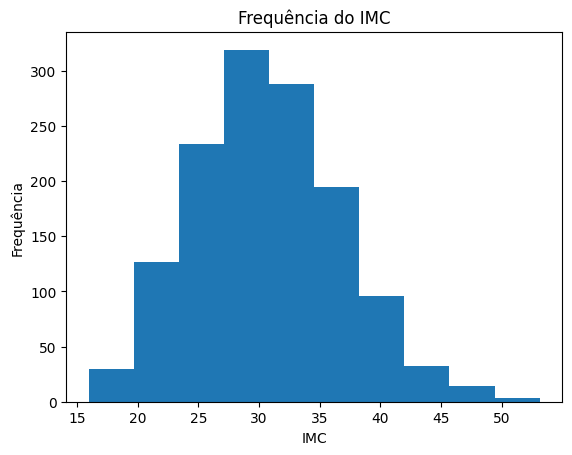

In [62]:
# Histograma

plt.hist(df['bmi'])
plt.title("Frequência do IMC")
plt.xlabel("IMC")
plt.ylabel("Frequência")
plt.show()

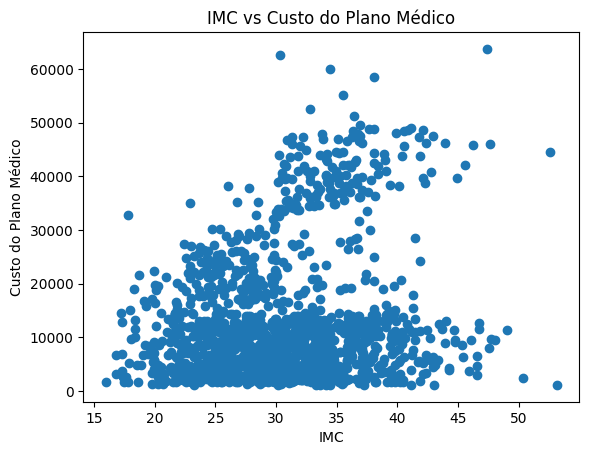

In [86]:
# Gráfico de Dispersão

plt.scatter(df['bmi'], df['charges'])
plt.title("IMC vs Custo do Plano Médico")
plt.xlabel("IMC")
plt.ylabel("Custo do Plano Médico")
plt.show()